In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import requests

In [2]:
zones = gpd.read_file('data/taxi_zones__7_/taxi_zones.shp')

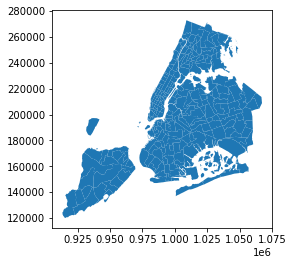

In [3]:
zones.plot()

In [4]:
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."


In [5]:
zones.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
len(zones)

263

In [7]:
tracts = gpd.read_file('https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Tracts_for_2010_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson')

In [8]:
tracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
zones = zones.to_crs(epsg=4326)

In [10]:
zones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

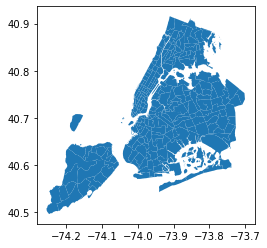

In [11]:
zones.plot()

In [42]:
#gpd.sjoin(zones, tracts, how = 'right', op = 'covers').plot(column = 'LocationID', figsize = (10,10))

In [44]:
tracts_with_zones = gpd.read_file("data/tracts_with_zones/tracts_with_zones.shp")

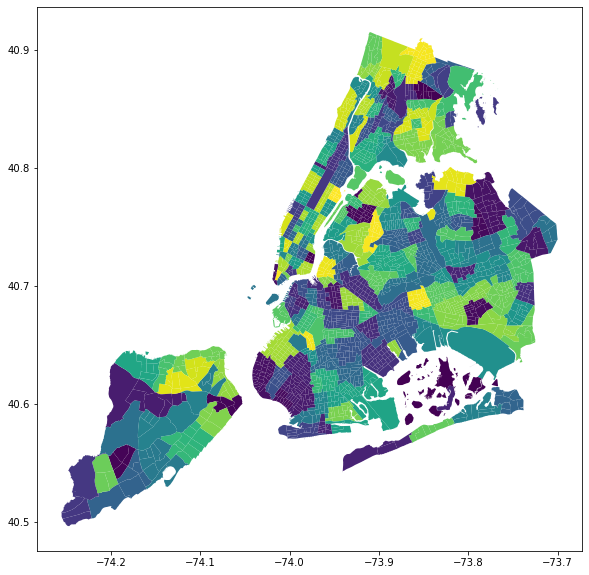

In [49]:
tracts_with_zones.plot(column = 'LocationID', figsize = (10,10))

In [51]:
len(tracts_with_zones)

2165

In [52]:
census = pd.read_csv('data/census_data/nyc_acs_2019_5yr.csv')

In [88]:
census['Geo_FIPS'] = census['Geo_FIPS'].astype('str')

In [75]:
code_dict = {'5':'085', '1':'061','2':'005','3':'047','4':'081'}
code_dict

{'5': '085', '1': '061', '2': '005', '3': '047', '4': '081'}

In [102]:
def makeFIPS(boro, tract):
    boro_code = boro.map(code_dict)
    return('36' + boro_code + tract)

In [103]:
tracts_with_zones['Geo_FIPS'] = makeFIPS(tracts_with_zones['BoroCode'], tracts_with_zones['CT2010'])

In [107]:
census_zones = tracts_with_zones.merge(census, on = 'Geo_FIPS', how='left')

Text(0.5, 1.0, 'Educational Services, and Health Care and Social  Assistance Employees, 2019')

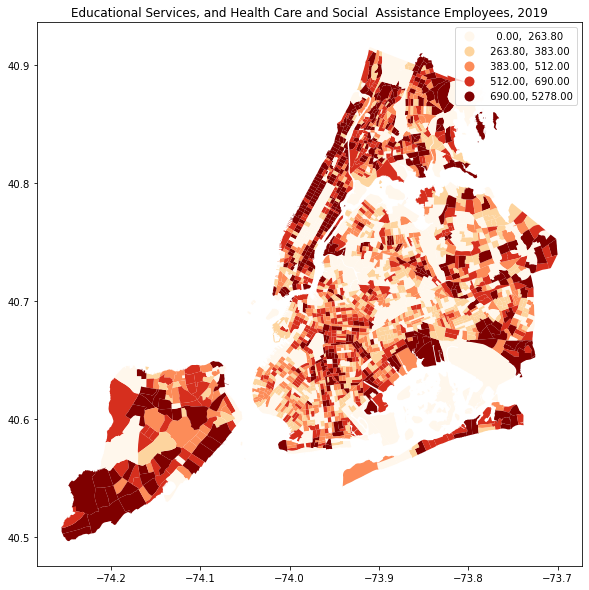

In [116]:
census_zones.plot(column= 'SE_A17004_011', scheme = 'quantiles', figsize = (10,10), legend = True, cmap = "OrRd")
plt.title('Educational Services, and Health Care and Social  Assistance Employees, 2019')

Note: census_zones is a geodataframe of census tracts with taxi zone codes ("LocationID") and a ton of census variables, which are outlined in the metadata.txt file within the census_data folder inside the data_folder. I also saved census_zones as a csv for reading in as a pandas dataframe or a geopandas geodataframe in other notebooks, if necessary. 

In [123]:
census_zones.to_csv('data/census_zones/census_zones.csv')